# Digit Classification with KNN and Naive Bayes

Sophia Skowronski | Fall 2020

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

Check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd # PETER GRABOWSKI's SECTION 4 -- SAID WE COULD IMPORT PANDAS!!!!!
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.22.1'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

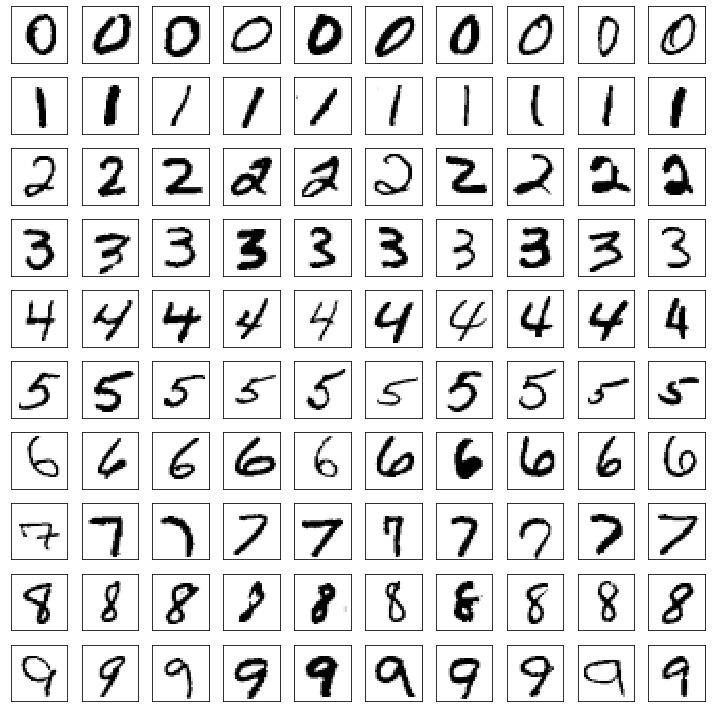

In [5]:
def P1(num_examples=10):

### STUDENT START ###

    # Because there are only 10 unique digits in the target data, restrict the number of possible rows
    if num_examples > 10:
        nrows=10 # This will result in a (10 x `num_examples`) rectangular grid
    else:
        nrows=num_examples # This will result in a (`num_examples` x `num_examples`) square grid
    
    # Plot 10x10 grid that visualizes 10 examples of each digit.
    _, axs = plt.subplots(nrows=nrows, ncols=num_examples, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})
    
    # Row loop
    for i in range(nrows):
        
        # Find location of first # (equal to `nrows`) examples found in target array
        where_vals_are = np.where(Y==str(i))[0][:num_examples]
        
        # Column loop
        for j in range(num_examples):
            
            grid = X[where_vals_are[j]].reshape(28,28)
            axs[i][j].imshow(grid, cmap='Greys')
    
    # Display
    plt.tight_layout()
    plt.show()
        
### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [39]:
def P2(k_values):

### STUDENT START ###
    
    # Output accuracy data for each k-value
    accuracies = []
    
    # Iterate over list of k-values
    for value in k_values:
        
        # Produce a k-nearest neighbor model.
        # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
        neigh = KNeighborsClassifier(n_neighbors=value)
        
        # Train on the train data.
        neigh.fit(mini_train_data, mini_train_labels)

        # Evaluate performance on the dev data. Returns the mean accuracy on the given test data and test labels.
        accuracy = neigh.score(dev_data, dev_labels)
        accuracies.append(accuracy)
        
        # For the 1-Nearest Neighbor model, get precision, recall, and F1 results.
        if value == 1:
            
            # Predict the class labels for the provided data.
            dev_labels_predicted = neigh.predict(dev_data)
            
            # For the 1-Nearest Neighbor model, get precision, recall, and F1 results.
            # Precision = True Positive / Total Predicted Positive
            # Recall = True Positive / Total Actual Positive
            # F1 = (2 * Precision * Recall) / (Precision + Recall)
            # Support is the number of actual occurrences of the class in the specified dataset.
            print('1-Nearest Neighbor model...........\n\n'+classification_report(dev_labels, dev_labels_predicted))
    
    # Output
    print('k-Nearest Model Accuracies')
    print(pd.DataFrame({'k-value':k_values, 'accuracy':accuracies}).to_string(index=False))

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

1-Nearest Neighbor model...........

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k-Nearest Model Accuracies
 k-value  accuracy
       1     0.884
       3     0.876
       5     0.882
       7     0.877
       9     0.875


**ANSWER**: 8 is the most difficult digit for the 1-Nearest Neighbor model to recognize, with the lowest F1 score and recall score in the classes set.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [14]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    
    # Output ccuracy and time for each training dataset size.
    times = []
    
    # Iterate over list of train_sizes
    for size in train_sizes:
        
        # Produce a 1-nearest neighbor model.
        # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
        neigh = KNeighborsClassifier(n_neighbors=1)
        
        # Train on subsets of the train set.
        neigh.fit(train_data[:size], train_labels[:size])

        # Evaluate performance on the dev set.
        
        # Start timer
        start=time.time()
        
        # Calculates the mean accuracy on the given test data and test labels.
        accuracy = neigh.score(dev_data, dev_labels)
        accuracies.append(accuracy)
        
        # End timer
        end=time.time()
        
        # Calculate the time needed to measure the performance of each model.
        seconds = end-start
        times.append(seconds)
    
    # Output 
    print(pd.DataFrame({'train_size':train_sizes, 'accuracy':accuracies, 'time (sec)': times}).to_string(index=False))
        
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

 train_size  accuracy  time (sec)
        100     0.702    0.137035
        200     0.791    0.254964
        400     0.811    0.499039
        800     0.866    1.000004
       1600     0.905    1.949992
       3200     0.927    3.811962
       6400     0.939    7.512997
      12800     0.952   14.866966
      25600     0.963   29.961004


### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

LinearRegression: y ~ X
Accuracies for test data: [1.23617317 1.63742805 7.52249967]
R-Squared: 0.418

LinearRegression Transformation #1: y/(y-1) ~ log(X)
Accuracies for test data: [0.96307017 0.96659196 0.97413657]
R-Squared: 0.940

LinearRegression Transformation #2: log(y/(y-1)) ~ log(X)
Accuracies for test data: [0.97575264 0.98186682 0.99260572]
R-Squared: 0.990



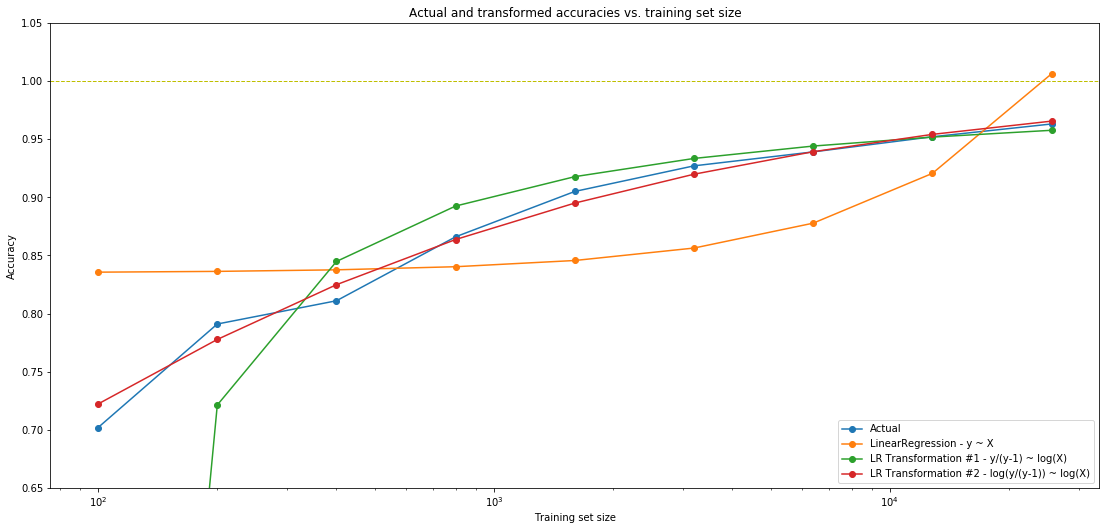

In [40]:
def P4():

### STUDENT START ###

    # Array of training set sizes.
    X = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]) # SHAPE: (9,)
    X = X.reshape(len(X),1) # SHAPE: (9, 1)
    
    # The (transformed) accuracies estimated in Problem 3
    y = np.array([0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.963]) # SHAPE: (9,)
        
    # Array of predicted training set sizes.
    test_X = np.array([60000, 120000, 1000000]) # SHAPE: (3,)
    test_X = test_X.reshape(len(test_X),1) # SHAPE: (3, 1)
    
    # Produce a linear regression model.
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    regr = LinearRegression()
    
    # Train the linear regression models on all of the accuracies estimated in Problem 3.
    regr.fit(X,y)
    
    # Predicts accuracy of a 1-Nearest Neighbor model on  training data
    y_plot = regr.predict(X)
    
    # Predict accuracy of a 1-Nearest Neighbor model for training size of [60000, 120000, 1000000]
    print('LinearRegression: y ~ X\nAccuracies for test data: {}'.format(regr.predict(test_X)))
    print('R-Squared: {:.3f}\n'.format(regr.score(X,y)))
    
    ########################################################
    # LinearRegression Transformation #1: y/(y-1) ~ log(X) #
    ########################################################
    
    # X: Logarithm transformation for train and test data
    X_log = np.log(X)
    test_X_log = np.log(test_X)
    
    # y: Transformation from accuracy (value between 0 and 1) to odds ratio
    y_odds = y / (1-y)
    
    # Train the linear regression models on all of the transformed accuracies estimated in Problem 3.
    regr.fit(X_log, y_odds)
    
    # Predicts accuracy of a 1-Nearest Neighbor model for original training data
    # Un-transform data for plotting
    y_predict_1 = regr.predict(X_log)
    y_predict_1 = y_predict_1 / (y_predict_1 + 1)
    
    # Predicts accuracy of a 1-Nearest Neighbor model for training size of [60000, 120000, 1000000]
    # Un-transform data for print out
    y_predict_test = regr.predict(test_X_log) 
    y_predict_test = y_predict_test / (y_predict_test + 1)
    
    # Predict accuracy of a 1-Nearest Neighbor model for training size of [60000, 120000, 1000000]
    print('LinearRegression Transformation #1: y/(y-1) ~ log(X)\nAccuracies for test data: {}'.format(y_predict_test))
    print('R-Squared: {:.3f}\n'.format(regr.score(X_log, y_odds)))
    
    #############################################################
    # LinearRegression Transformation #2: log(y/(y-1)) ~ log(X) #
    #############################################################
    
    # X: Logarithm transformation for train and test data
    X_log = np.log(X)
    test_X_log = np.log(test_X)
    
    # y: Transformation from accuracy (value between 0 and 1) to log-odds ratio
    y_log_odds = np.log(y / (1-y))
    
    # Train the linear regression models on all of the transformed accuracies estimated in Problem 3.
    regr.fit(X_log, y_log_odds)
    
    # Predicts accuracy of a 1-Nearest Neighbor model for original training data
    # Un-transform data for plotting
    y_predict_2 = np.exp(regr.predict(X_log))
    y_predict_2 = y_predict_2 / (y_predict_2 + 1)
    
    # Predicts accuracy of a 1-Nearest Neighbor model for training size of [60000, 120000, 1000000]
    # Un-transform data for print out
    y_predict_test = np.exp(regr.predict(test_X_log))
    y_predict_test = y_predict_test / (y_predict_test + 1)
    
    # Predict accuracy of a 1-Nearest Neighbor model for training size of [60000, 120000, 1000000]
    print('LinearRegression Transformation #2: log(y/(y-1)) ~ log(X)\nAccuracies for test data: {}'.format(y_predict_test))
    print('R-Squared: {:.3f}\n'.format(regr.score(X_log, y_log_odds)))
    
    #############
    # Plotting! #
    #############
    
    # Make dataframe for plotting
    actual = pd.DataFrame({'Training':list(X.reshape(len(X))), 
                       'Accuracy':list(y), 
                       'Label':'Actual'})
    linear_model = pd.DataFrame({'Training':list(X.reshape(len(X))), 
                       'Accuracy':y_plot, 
                       'Label':'LinearRegression - y ~ X'})
    transform_1 = pd.DataFrame({'Training':list(X.reshape(len(X))), 
                                 'Accuracy':list(y_predict_1), 
                                 'Label':'LR Transformation #1 - y/(y-1) ~ log(X)'})    
    transform_2 = pd.DataFrame({'Training':list(X.reshape(len(X))), 
                                 'Accuracy':list(y_predict_2), 
                                 'Label':'LR Transformation #2 - log(y/(y-1)) ~ log(X)'}) 
    df = pd.concat([actual, linear_model, transform_1, transform_2])
    
    # Plot to compare model fit before and after transformations.
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
    
    # Diplay lineplot of actual accuracies and predicted accuracies vs. training set size 
    # over the range of training set sizes in the training data. 
    plt.plot(actual['Training'], actual['Accuracy'], marker='o', label=actual['Label'][0])
    plt.plot(actual['Training'], linear_model['Accuracy'], marker='o', label=linear_model['Label'][0])
    plt.plot(actual['Training'], transform_1['Accuracy'], marker='o', label=transform_1['Label'][0])
    plt.plot(actual['Training'], transform_2['Accuracy'], marker='o', label=transform_2['Label'][0])
    ax.axhline(y=1, linewidth=1, color='y', ls='--')
    
    # y-axis
    ax.set_ylim(0.65, 1.05)
    
    # x-axis
    ax.set_xscale('log')
    
    # Axis labels
    ax.set_title('Actual and transformed accuracies vs. training set size')
    ax.set_xlabel('Training set size')
    ax.set_ylabel('Accuracy')
    
    # Legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[0:], labels=labels[0:])
    
    # Display
    plt.tight_layout(pad=3.0)
    plt.show()

### STUDENT END ###

P4()

**ANSWER**: The linear regression model on its own does not take into account the boundaries for accuracy, which should be between 0 and 1. For a sufficiently large $x$ -- without transformations -- the predicted linear model will increase beyond 1. You can see this in the orange line above.

For the first transformed model (green line), mapping accuracy to odds ratio will allow us to tranforms any reasonable y-values back to a range between 0 and 1. However, I got a predicted value of $y = -0.36$ accuracy for $x = 100$ training size. The model does not work as well when $x$ is small.

As another test, I used logistic regression to see if a better fit was possible, and the best $R^{2}$ value was reached  using a second logarthim transformation over the odds ratio of the outcom (red line).

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Confusion Matrix
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]



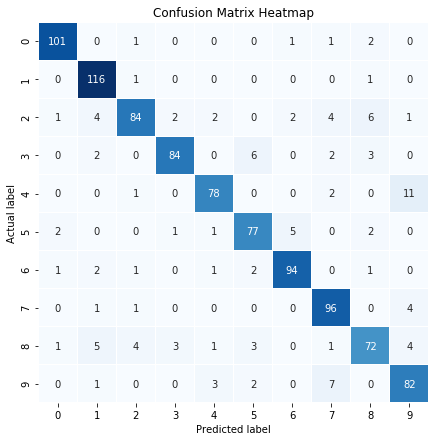

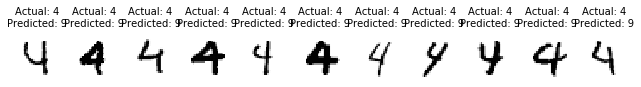

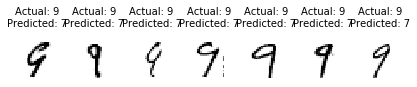

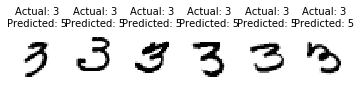

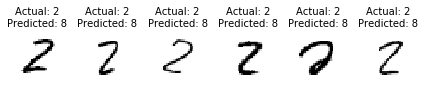

In [15]:
def P5():

### STUDENT START ###
    
    # Produce a 1-Nearest Neighbor model 
    neigh = KNeighborsClassifier(n_neighbors=1)
    
    # Train on the mini train set
    neigh.fit(mini_train_data, mini_train_labels)
    
    # Predict the class labels for the provided data.
    dev_labels_predicted = neigh.predict(dev_data)
    
    # Evaluate performance on the dev set.
    accuracy = neigh.score(dev_data, dev_labels)
            
    # Produce a oonfusion matrix
    confused = confusion_matrix(dev_labels, dev_labels_predicted)
    print('Confusion Matrix\n{}\n'.format(confused))
    
    # Plot oonfusion matrix as heatmap w/ seaborn
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
    
    import seaborn as sns
    sns.heatmap(confused, linewidths=.5, cmap='Blues', cbar=False, annot=True, fmt='d')
    ax.set_title('Confusion Matrix Heatmap')
    ax.set_ylabel('Actual label')
    ax.set_xlabel('Predicted label')
    
    ########################
    # Confused pair plots! #
    ########################
    
    # Find where actual 4s are predicted as 9s
    pairs_4_9 = np.intersect1d(np.where(dev_labels=='4'), np.where(dev_labels_predicted=='9'))
    
    # Plot 4s/9s
    _, axs = plt.subplots(nrows=1, ncols=len(pairs_4_9), figsize=(len(pairs_4_9), 3))
    for i,val in enumerate(pairs_4_9):
        grid = dev_data[val].reshape(28,28)
        axs[i].imshow(grid, cmap='Greys')
        axs[i].set_title('Actual: {}\nPredicted: {}'.format(dev_labels[val],dev_labels_predicted[val]), size=10)
        axs[i].axis('off')

    # Find where actual 9s are predicted as 7s
    pairs_9_7 = np.intersect1d(np.where(dev_labels=='9'), np.where(dev_labels_predicted=='7'))
    
    # Plot 9s/7s
    _, axs = plt.subplots(nrows=1, ncols=len(pairs_9_7), figsize=(len(pairs_9_7), 3))
    for i,val in enumerate(pairs_9_7):
        grid = dev_data[val].reshape(28,28)
        axs[i].imshow(grid, cmap='Greys')
        axs[i].set_title('Actual: {}\nPredicted: {}'.format(dev_labels[val],dev_labels_predicted[val]), size=10)
        axs[i].axis('off')

    # Find where actual 3s are predicted as 5s
    pairs_3_5 = np.intersect1d(np.where(dev_labels=='3'), np.where(dev_labels_predicted=='5'))
    
    # Plot 3s/5s
    _, axs = plt.subplots(nrows=1, ncols=len(pairs_3_5), figsize=(len(pairs_3_5), 3))
    for i,val in enumerate(pairs_3_5):
        grid = dev_data[val].reshape(28,28)
        axs[i].imshow(grid, cmap='Greys')
        axs[i].set_title('Actual: {}\nPredicted: {}'.format(dev_labels[val],dev_labels_predicted[val]), size=10)
        axs[i].axis('off')
    
    # Find where actual 2s are predicted as 8s
    pairs_2_8 = np.intersect1d(np.where(dev_labels=='2'), np.where(dev_labels_predicted=='8'))
    
    # Plot 2s/8s
    _, axs = plt.subplots(nrows=1, ncols=len(pairs_2_8), figsize=(len(pairs_2_8), 3))
    for i,val in enumerate(pairs_2_8):
        grid = dev_data[val].reshape(28,28)
        axs[i].imshow(grid, cmap='Greys')
        axs[i].set_title('Actual: {}\nPredicted: {}'.format(dev_labels[val],dev_labels_predicted[val]), size=10)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()
    
### STUDENT END ###

P5()

**ANSWER**: Trained on the mini train set, this 1-Nearest Neighbor model confuses actual 4s as 9s the most.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.


In [41]:
def P6():
    
### STUDENT START ###
    
    # Output dataframe w/ accuracy and weight for each situation.
    situations = []
    weights = []
    accuracies = []
    
    # Test multiple sigma values.
    weight_list = [0.5, 1.0, 1.5, 2.0]
    
    # With weight matrix, we can calculate the value of Gaussian Blur for these 9 points.
    nearest_points = [[(-1,1), (0,1), (1,1)],
                       [(-1,0), (0,0), (1,0)],
                       [(-1,-1), (0,-1), (1,-1)]]

    # Produce a 1-nearest neighbor model.
    neigh = KNeighborsClassifier(n_neighbors=1)
        
    ######################################
    # Situation 1: Do not use the filter #
    ######################################
    
    # Train on the mini train set
    neigh.fit(mini_train_data, mini_train_labels)
    
    # Evaluate performance on the dev set.
    accuracies.append(neigh.score(dev_data, dev_labels))
    weights.append('NA')
    situations.append(1)
    
    # For each weight, make copy of mini train data set and dev data set.
    copied_mini_train_data = []
    copied_dev_data = []
    for i,_ in enumerate(weight_list):
        # Copy dev and train data.
        copied_mini_train_data.append(mini_train_data.copy())
        copied_dev_data.append(dev_data.copy())
    
    # For each weight, apply 3 other situations of 1-Neighest Neighbor on data
    for i,sigma in enumerate(weight_list):
        
        # Create gaussian filter
        # Based on: http://web.archive.org/web/20150212030358/https://www.pixelstech.net/article/1353768112-Gaussian-Blur-Algorithm
        # Calculate value with 2-dimensional gaussian helper function
        gauss_filter = np.zeros((3,3))
        for i,row in enumerate(nearest_points):
            for j,point in enumerate(row):
                gauss_filter[i][j] = gauss_2d(point[0], point[1], sigma)
        
        # Since we are calculating the weighted average of these 9 points, then the sum should be 1, 
        gauss_filter = gauss_filter/np.sum(gauss_filter)
        
        # Filtered data using helper function
        # Use one of the copied datasets to transform with gauss filter.
        mini_train_data_gauss = np.apply_along_axis(apply_gauss_to_image_edge, 
                                                    1, 
                                                    copied_mini_train_data[i], 
                                                    guass_filter=gauss_filter)
        dev_data_gauss = np.apply_along_axis(apply_gauss_to_image_edge, 
                                             1, 
                                             copied_dev_data[i], 
                                             guass_filter=gauss_filter)
        
        ##############################################################
        # Situation 2: Filter the training data but not the dev data #
        ##############################################################
        
        # Train on the (filtered) mini train set
        neigh.fit(mini_train_data_gauss, mini_train_labels)
        # Evaluate performance on the dev set.
        accuracies.append(neigh.score(dev_data, dev_labels))
        weights.append(sigma)
        situations.append(2)
        
        ##############################################################
        # Situation 3: Filter the dev data but not the training data #
        ##############################################################
        
        # Train on the mini train set
        neigh.fit(mini_train_data, mini_train_labels)
        # Evaluate performance on the (filtered) dev set.
        accuracies.append(neigh.score(dev_data_gauss, dev_labels))
        weights.append(sigma)
        situations.append(3)
        
        #######################################################
        # Situation 4: Filter both training data and dev data #
        #######################################################
        
        # Train on the (filtered) mini train set
        neigh.fit(mini_train_data_gauss, mini_train_labels)
        # Evaluate performance on the (filtered) dev set.
        accuracies.append(neigh.score(dev_data_gauss, dev_labels))
        weights.append(sigma)
        situations.append(4)
        
    # Output
    df = pd.DataFrame({'situation':situations, 'accuracy':accuracies, 'sigma':weights}).sort_values('situation').reset_index(drop=True)
    print('Situation 1: Do not use the filter\nSituation 2: Filter the training data but not the dev data\nSituation 3: Filter the dev data but not the training data\nSituation 4: Filter both training data and dev data\n')
    print('*'*61)
    print('* Models that have an accuracy greater than or equal to 0.9 *')
    print('*'*61)
    print(df[df.accuracy >= 0.9].sort_values('accuracy').to_string(index=False))
    print()
    print('*'*21)
    print('* All tested models *')
    print('*'*21)
    print(df.to_string(index=False))

# Helper function for normalized 2D gaussian
def gauss_2d(x, y, sigma):
    return 1. / (2. * np.pi * sigma**2.) * np.exp(-(x**2. + y**2.)/ (2. * sigma**2.))

# Helper function for applying gaussian filter to images in dataset
def apply_gauss_to_image_edge(image, guass_filter):
    image = image.reshape(28,28)
    
    # Add border of 0s around the image to help with edge calculations
    image = np.pad(image, pad_width=1, mode='constant', constant_values=0)
    
    # Row loop
    for i in range(1,image.shape[0]-1):
        
        # Column loop
        for j in range(1,image.shape[0]-1):
            
            # Calculate sum of the matrix multiplication of gauss kernal w/ 3x3 window.
            image[i][j] = np.sum(image[(i-1):(i+2),(j-1):(j+2)]*guass_filter)
    
    # Remove border and return transformed 3x3 window.
    return image[1:-1,1:-1].flatten()

### STUDENT END ###

P6()

Situation 1: Do not use the filter
Situation 2: Filter the training data but not the dev data
Situation 3: Filter the dev data but not the training data
Situation 4: Filter both training data and dev data

*************************************************************
* Models that have an accuracy greater than or equal to 0.9 *
*************************************************************
 situation  accuracy sigma
         4     0.905     1
         4     0.907     2
         4     0.908   1.5

*********************
* All tested models *
*********************
 situation  accuracy sigma
         1     0.884    NA
         2     0.897   0.5
         2     0.898     1
         2     0.898   1.5
         2     0.899     2
         3     0.879   0.5
         3     0.869     1
         3     0.871   1.5
         3     0.871     2
         4     0.898   0.5
         4     0.905     1
         4     0.908   1.5
         4     0.907     2


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Does the multinomial version improve the results? Why or why not?

In [17]:
def P7():

### STUDENT START ###
    
    # Produce Naive Bayes model using BernoulliNB
    # Map pixel values to either 0 or 1, representing white or black 
    # https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
    # Can find threshold values based on information gain
    clf = BernoulliNB(binarize = 0.1)
    
    # Train on the mini train set
    clf.fit(mini_train_data, mini_train_labels)
    
    # Evaluate performance on the dev set.
    print('Bernoulli model accuracy: {:.2f}%'.format(clf.score(dev_data, dev_labels)*100))
    
    # Pre-process
    # Map pixel values to either 0, 1, or 2, representing white, gray, or black
    mini_train_data_processed = mini_train_data.copy()
    mini_train_data_processed[mini_train_data_processed > 0.9] = 2
    mini_train_data_processed[(mini_train_data_processed > 0.1) & (mini_train_data_processed <= 0.9)] = 1
    mini_train_data_processed[mini_train_data_processed <= 0.1] = 0
    
    # Produce Naive Bayes model using MultinomialNB
    # https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
    clf = MultinomialNB()
    
    # Train on the (processed) mini train set
    clf.fit(mini_train_data_processed, mini_train_labels)
    
    # Evaluate performance on the dev set.
    print('Multinomial model accuracy: {:.2f}%'.format(clf.score(dev_data, dev_labels)*100))
    
### STUDENT END ###

P7()

Bernoulli model accuracy: 81.40%
Multinomial model accuracy: 80.70%


**ANSWER**: The multinomial model does not improve results because you do not gain additional (useful) information when splitting the pixel values into three types. Since we're trying to discriminate whethere there is a line there or not, a third category about how much pressure has been applied in writing the digit with grey values actually hurts solving the problem.

### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [18]:
def P8(alphas):

### STUDENT START ###

    # Produce Naive Bayes model using BernoulliNB. The default binarization threshold is 0.
    # https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
    
    # Use GridSearchCV to vary alpha and evaluate performance by 5-fold cross-validation. 
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    nb_cross_val = GridSearchCV(BernoulliNB(binarize=0), param_grid=alphas, scoring='accuracy')
    
    # Train on the mini train set
    nb_cross_val.fit(mini_train_data, mini_train_labels)
    
    # Import pandas to output dataframe w/ alphas and mean test score
    import pandas as pd 
    print(pd.DataFrame({'alphas':[str(item) for item in alphas['alpha']], 
                        'mean_test_score':nb_cross_val.cv_results_['mean_test_score']}).to_string(index=False))
    # Output
    return nb_cross_val

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print('Best alpha = ', nb.best_params_)

 alphas  mean_test_score
  1e-10            0.814
 0.0001            0.819
  0.001            0.825
   0.01            0.822
    0.1            0.818
    0.5            0.813
    1.0            0.809
    2.0            0.805
   10.0            0.783

Best alpha =  {'alpha': 0.001}


**ANSWER**: Accuracy for $\alpha$ close to 0 is 81.4%. Based on the `mean_test_score` outputs, smoothing is not linearly correlated to accuracy. The bigger the $\alpha$, the less sensitive the model is to one feature. The smaller the $\alpha$, the more sensitive it is to any particular feature and the closer it gets to the "actual" accuracy.

At the feature level, smoothing should help turn some 0's into 1's, especially at the digit edges to make the feature vectors more dense. This helps account for digits written differently and to account for unseen examples. Larger alphas could over-smooth the data, which will bias towards the class with the most counts and underfit the data.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

In [19]:
def P9():

### STUDENT END ###
    
    # Produce Naive Bayes model using GaussianNB.
    # https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
    gs_nb = GaussianNB()
    
    # Train on the mini train set.
    gs_nb.fit(mini_train_data, mini_train_labels)
    
    # Evaluate performance on the dev set.
    print('Score before: {:.2f}%'.format(gs_nb.score(dev_data, dev_labels)*100))
    
    # Use GridSearchCV to vary `var_smoothing` and evaluate performance by 5-fold cross-validation. 
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    #var_smoothings = {'var_smoothing': list(np.arange(0.001,1, 0.001))}
    #gs_cross_val = GridSearchCV(GaussianNB(), param_grid=var_smoothings, scoring='accuracy') 
    #gs_cross_val.fit(mini_train_data, mini_train_labels)
    #optimal = gs_cross_val.best_params_['var_smoothing']
    
    # Resulting optimal `var_smoothing` parameter
    optimal = 0.035

    # Produce Naive Bayes model using GaussianNB and optimal `var_smoothing` parameter
    gs_nb_after = GaussianNB(var_smoothing=optimal)
    
    # Train on the mini train set.
    gs_nb_after.fit(mini_train_data, mini_train_labels)
    
    # Output
    print('The portion of max variance to add to all variance: {:.2f}%'.format(optimal*100))
    print('Score after: {:.2f}%'.format(gs_nb_after.score(dev_data, dev_labels)*100))

### STUDENT END ###

P9()

Score before: 59.30%
The portion of max variance to add to all variance: 3.50%
Score after: 81.40%


**ANSWER**: We can incrementally increase the variance of each feature probability to help with the discreteness of resulting pixel probability distributions, which get padded with $10^{-9}$ portion of the max variance by default in `GaussianNB`. We can also use `GridSearchCV` to find the optimal value of the `var_smoothing` parameter. It is commented out in the above code, but the resulting, optimal `var_smoothing` parameter is 3.5%.

A gaussian distribution is not a good representation of the data set. The Gaussian Naive Bayes works well with normally distributed data, but the feature values are very skewed because of the white space. If the sigma is small, the chances of geting over to other data points and capturing probabilties are very low. Lacking an infinite data set to train the Gaussian MLE $\sigma$ and $\theta$, some variance is needed to make the model more flexible to new input. While we could modify the data directly, the easiest fix is to adjust `var_smoothing` in the model to smooth out feature variance.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

How do the generated digit images compare to the training digit images?

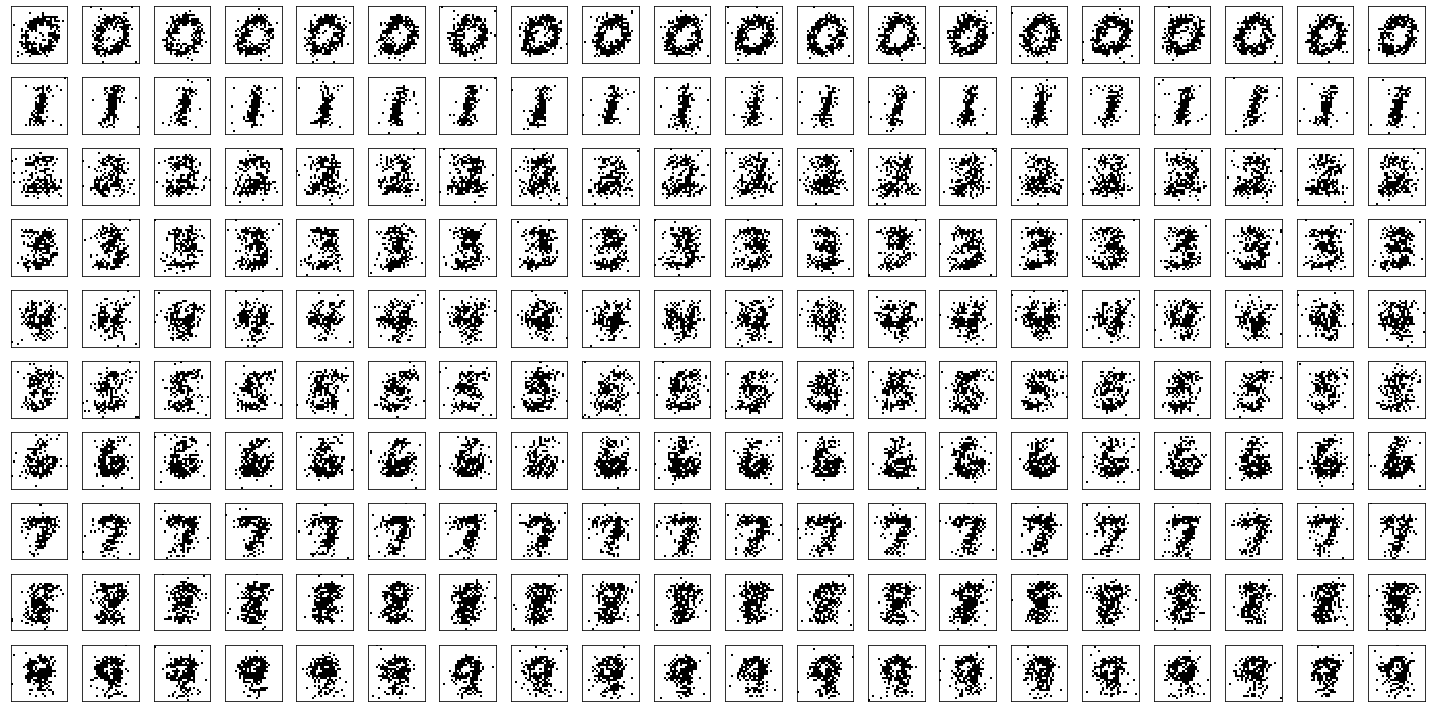

In [30]:
def P10(num_examples):

### STUDENT START ###

    # Produce Naive Bayes model using BernoulliNB
    # https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
    nb = BernoulliNB()
    
    # Train on the mini train set
    nb.fit(mini_train_data, mini_train_labels)
    
    # Pull estimated probability of each pixel from trained model. Convert log probability back to probability.
    pixel_prob = np.exp(nb.feature_log_prob_)
    
    # Plot 10x20 grid with 20 example images of each digit.
    _, axs = plt.subplots(nrows=10, ncols=num_examples, figsize=(num_examples, 10), subplot_kw={'xticks': [], 'yticks': []})
    
    # Row loop
    for i in range(10): 
        
        # Column loop
        for j in range(num_examples): 
            
            # Produce randomly generated sample data with 784 points uniformly distributed between between 0 and 1.
            random = np.random.rand(784)
            
            # Compare random array to the feature probability array of the pixel being  0 or 1.
            random = np.where((random >= pixel_prob[i]), 0, 1)
            
            # Reshape for plotting.
            grid = random.reshape(28,28)
            axs[i][j].imshow(grid, cmap='Greys')
    
    # Display
    plt.tight_layout()
    plt.show()

### STUDENT END ###

P10(20)

**ANSWER**: The resulting images are more splotchy but generally follow the shape of the class. The randomly generated sample data was uniformly distributed over 0 and 1, whereas the training data is skewed closer to 0, so when applying the threshold over the the generated data, most of the time the random number is going to be greater than the actual feature pixel probabilities. You can set additional pixel thresholds to get a clearer image of each digit.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [21]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    # Produce Naive Bayes model using BernoulliNB
    # https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
    nb = BernoulliNB(binarize = 0, alpha=0.001)
    
    # Train on the mini train set
    nb.fit(mini_train_data, mini_train_labels)
    
    # Use the trained model to predict the labels for the dev data.
    predict_label = nb.predict(dev_data)

    # Find maximum probability estimate for each test vector
    predict_labels_prob = nb.predict_proba(dev_data).max(axis=1)
    
    # Bin the probability estimates by the thresholds specified by the buckets
    predict_labels_prob = np.digitize(predict_labels_prob, buckets)

    # For each data point, check whether the threshold probability was correct.
    for i in range(1000):
        
        # Point at the right bucket threshold
        index = int(predict_labels_prob[i])-1
        
        # If the predicted label was correct, add 1. Else, do nothing.
        if int(predict_label[i]) == int(dev_labels[i]):
            correct[index] += 1
        
        # Add to bucket totals.
        total[index] += 1
    
    print('Overall accuracy of model is {:.2f}%.\n'.format(nb.score(dev_data, dev_labels)*100))
    
    return correct, total
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): 
        accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], 
                                                                           buckets[i], 
                                                                           total[i], 
                                                                           accuracy))

Overall accuracy of model is 82.30%.

p(pred) is 0.0000000000000 to 0.5000000000000    total =  31    accuracy = 0.355
p(pred) is 0.5000000000000 to 0.9000000000000    total =  67    accuracy = 0.433
p(pred) is 0.9000000000000 to 0.9990000000000    total =  59    accuracy = 0.458
p(pred) is 0.9990000000000 to 0.9999900000000    total =  46    accuracy = 0.652
p(pred) is 0.9999900000000 to 0.9999999000000    total =  62    accuracy = 0.774
p(pred) is 0.9999999000000 to 0.9999999990000    total =  33    accuracy = 0.788
p(pred) is 0.9999999990000 to 0.9999999999900    total =  43    accuracy = 0.791
p(pred) is 0.9999999999900 to 0.9999999999999    total =  19    accuracy = 0.842
p(pred) is 0.9999999999999 to 1.0000000000000    total = 640    accuracy = 0.941


**ANSWER**: Since there is a positive correlation between the posterior probabilities and accuracies for each bucket, we can see that the classifer is not poorly calibrated. To the extent that it is weakly or strongly calibrated, we notice  that the classifier is more accurate as the posterior probabilities increase. Since the accuracy is not constant for each bucket, we can conclude that this is a weakly calibrated classifer. 

For instance, if the posterior probability is between 50% and 90%, we would expect a strongly calibrated classifer's accuracy to be about 70% for this bucket, and the data above outputs an accuracy of 43%, which is outside of the range. We could examine this data fruther by binning the accuracy scores by digit, to see if one digit in particular is skewing the classifier's accuracy. It may also be the case that we need more data points in the smaller bucket thresholds with more varied training images. This is a good starting point for calculating the performance of this classification model.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

In [11]:
def P12():

### STUDENT START ###

    # Produce Naive Bayes model using BernoulliNB
    # https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html
    nb = BernoulliNB(binarize=0, alpha=0.001)
    nb.fit(mini_train_data, mini_train_labels)
    print('Baseline score: {:.2f}%'.format(nb.score(dev_data, dev_labels)*100))
    
    # Use GridSearchCV to vary `binarize` and evaluate performance by 5-fold cross-validation. 
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    #params = {'binarize': list(np.arange(0.01,1,0.01))}
    #nb_cross_val = GridSearchCV(BernoulliNB(), param_grid=params, scoring='accuracy') 
    #nb_cross_val.fit(mini_train_data, mini_train_labels)
    #optimal = nb_cross_val.best_params_['binarize']
    nb = BernoulliNB(binarize=0.51, alpha=0.001)
    #nb = BernoulliNB(binarize=0, alpha=0.001)
    
    # Train model on the processed mini train set. Output score
    nb.fit(mini_train_data, mini_train_labels)
    print('Score using GridSearchCV for optimal `binarize` parameter: {:.2f}%'.format(nb.score(dev_data, dev_labels)*100))
    
    ####################################################################
    # Try summing or averaging the pixel values in each row or column. #
    ####################################################################
    
    functions = [row_average, row_sum, col_average, col_sum]
    for function in functions:
        # Apply function to a copy of the training and dev data.
        
        # These transform (28,28) images into rows or columns of length 28.
        mini_train_features = np.apply_along_axis(function, 1, mini_train_data.copy()) 
        print(mini_train_features[100])
        # Append new features to each row.
        new_mini_train_data = np.concatenate((mini_train_data.copy(), mini_train_features), axis=1)
        
        # The dev data needs to be transformed otherwise it will reject untransformed input.
        dev_features = np.apply_along_axis(function, 1, dev_data.copy())
        
        # Append new features to each row.
        new_dev_data = np.concatenate((dev_data.copy(), dev_features), axis=1)
        
        # Train model on the processed mini train set. Output score.
        nb.fit(new_mini_train_data, mini_train_labels)
        print('Score for {}: {:.2f}%'.format(function.__name__, nb.score(new_dev_data, dev_labels)*100))
    
    ###################################################################
    # Try summing or averaging the pixel values in each square block. #
    ###################################################################
    
    # Iterating through the square sizes, no accuracy above the baseline was reached, so skip.
    
    #for function in [square_avg, square_sum]:
    #    max_score = 0
    #    max_score_size = 0
    #    # Square size
    #    for size in range(1,28):
    #        copy_mini_train_data = np.apply_along_axis(square_avg, 1, mini_train_data.copy(), size=size)
    #        nb.fit(copy_mini_train_data, mini_train_labels)
    #        score = nb.score(dev_data, dev_labels)
    #        # If larger score found, replace.
    #        if score > max_score:
    #            max_score = score
    #            max_score_size = size
    #    # Output
    #    print('Best score for {}, {}-pixel square: {:.2f}%'.format(function.__name__, max_score_size, max_score*100))
    
    ################################################
    # Try counting the number of enclosed regions. # AUTOMATED
    ################################################
    
    # These transform (28,28) images into rows or columns of length 28.
    mini_train_features = np.apply_along_axis(numEnclosures, 1, mini_train_data.copy()).reshape(-1,1)
    
    # Append new features to each row.
    new_mini_train_data = np.concatenate((mini_train_data.copy(), mini_train_features), axis=1)
    
    # The dev data needs to be transformed otherwise it will reject untransformed input.
    dev_features = np.apply_along_axis(numEnclosures, 1, dev_data.copy()).reshape(-1,1)
        
    # Append new features to each row.
    new_dev_data = np.concatenate((dev_data.copy(), dev_features), axis=1)
    
    # Train model on the processed mini train set. Output score.
    nb.fit(new_mini_train_data, mini_train_labels)
    print('Score for {}: {:.2f}%'.format(numEnclosures.__name__, nb.score(new_dev_data, dev_labels)*100))
    
    ################################################
    # Try counting the number of enclosed regions. # MANUALLY
    ################################################
    
    enclosed = {'0':1, '1':0, '2':1, '3':1, '4':0, '5':0, '6':1, '7':0, '8':2, '9':1}
    mini_train_features_m = np.vectorize(enclosed.__getitem__ )(mini_train_labels.copy()).reshape(-1,1)
    mini_train_features_m = np.where(mini_train_features_m != mini_train_features, 1, 0)
    dev_features_m = np.vectorize(enclosed.__getitem__ )(dev_labels.copy()).reshape(-1,1)
    dev_features_m = np.where(dev_features_m != dev_features, 1, 0)
    
    # Append new features to each row.
    new_mini_train_data = np.concatenate((mini_train_data.copy(), mini_train_features, mini_train_features_m,
                                          np.apply_along_axis(row_sum, 1, mini_train_data.copy()),
                                          np.apply_along_axis(col_average, 1, mini_train_data.copy())), axis=1)
    
    # Append new features to each row.
    new_dev_data = np.concatenate((dev_data.copy(), dev_features, dev_features_m,
                                   np.apply_along_axis(row_sum, 1, dev_data.copy()),
                                   np.apply_along_axis(col_average, 1, dev_data.copy())), axis=1)
    
    # Train model on the processed mini train set. Output score.
    nb.fit(new_mini_train_data, mini_train_labels)
    print('Score for manual features: {:.2f}%'.format(nb.score(new_dev_data, dev_labels)*100))
    
    
    ###########################################
    # Concatenate multiple features together. #
    ###########################################
    
    # Based on resulting accuracies, will concatenate 784 pixel features with:
    # 1- the number of enclosures (1 feature)
    # 2- the row sums (28 features)
    # 3- column averages (28 features)
    
    new_mini_train_data = np.concatenate((mini_train_data.copy(),
                                          np.apply_along_axis(numEnclosures, 1, mini_train_data.copy()).reshape(1000,1),
                                          #np.apply_along_axis(col_sum, 1, mini_train_data.copy()), # Did not increase accuracy
                                          np.apply_along_axis(row_sum, 1, mini_train_data.copy()),
                                          #np.apply_along_axis(row_average, 1, mini_train_data.copy()), # Did not increase accuracy
                                          np.apply_along_axis(col_average, 1, mini_train_data.copy())),
                                         axis=1)
    new_dev_data = np.concatenate((dev_data.copy(),
                                   np.apply_along_axis(numEnclosures, 1, dev_data.copy()).reshape(1000,1),
                                   #np.apply_along_axis(col_sum, 1, dev_data.copy()), # Did not increase accuracy
                                   np.apply_along_axis(row_sum, 1, dev_data.copy()),
                                   #np.apply_along_axis(row_average, 1, dev_data.copy()), # Did not increase accuracy
                                   np.apply_along_axis(col_average, 1, dev_data.copy())),
                                  axis=1)
    
    # Train final model on the processed mini train set. Output score.
    nb.fit(new_mini_train_data, mini_train_labels)
    print('Score for concatenated features: {:.2f}%'.format(nb.score(new_dev_data, dev_labels)*100))
        

#####################
# Helper functions! #
#####################
            
def numEnclosures(grid):
    # This defines an enclosure as a set of points surrounded on all sides by 1s.
    # Set values to 0 or 1 based on optimal `binarize` value
    grid = np.where(grid > 0.51, 0, 1).reshape(28,28).tolist()
    holes = 0
    # Row loop
    for i in range(len(grid)):
        # Column loop
        for j in range(len(grid[0])):
            # Begin counting enclosed regions
            if grid[i][j] == 1:
                holes += 1     
                # Recursive call
                part_of_enclosure(i, j, grid)
    # Subtract 1 to remove extra surrounding white space count
    return holes - 1

def part_of_enclosure(i, j, grid):
    # If you reached an edge of the grid or the end of the enclosed region, end recurison.
    if (i < 0) or (j < 0) or (i == len(grid)) or (j == len(grid[0])) or (grid[i][j] != 1):
        return
    # Else, set the current point to 0 to show you've seen the data point
    else:
        grid[i][j] = 0
    # Continue to traverse grid in all four directions
    part_of_enclosure(i, j+1, grid) # Right
    part_of_enclosure(i, j-1, grid) # Left
    part_of_enclosure(i+1, j, grid) # Up
    part_of_enclosure(i-1, j, grid) # Down
    
def row_average(image):
    # Helper function to apply row averages
    return image.reshape(28,28).mean(axis=1) 

def row_sum(image):
    # Helper function to apply row sums
    return image.reshape(28,28).sum(axis=1)

def col_average(image):
    # Helper function to apply column averages
    return image.reshape(28,28).mean(axis=0) 

def col_sum(image):
    # Helper function to apply column sums
    return image.reshape(28,28).sum(axis=0)

def square_avg(image, size):
    # Helper function to apply sum to square
    image = image.reshape(28,28)
    for i in range(28-size):
        for j in range(28-size):
            image[i][j] = np.mean(image[(i):(i+size),(j):(j+size)])
    return image.flatten()    

def square_sum(image, size):
    # Helper function to apply sum to square
    image = image.reshape(28,28)
    for i in range(28-size):
        for j in range(28-size):
            image[i][j] = np.sum(image[(i):(i+size),(j):(j+size)])
    return image.flatten()   

### STUDENT END ###

P12()

Baseline score: 82.30%
Score using GridSearchCV for optimal `binarize` parameter: 83.10%
[0.         0.         0.         0.         0.         0.
 0.1245098  0.22170868 0.39467787 0.3140056  0.08151261 0.0592437
 0.05896359 0.07436975 0.08081232 0.16694678 0.18809524 0.18711485
 0.21162465 0.10294118 0.08431373 0.08445378 0.07703081 0.082493
 0.07871148 0.0487395  0.         0.        ]
Score for row_average: 83.40%
[ 0.          0.          0.          0.          0.          0.
  3.48627451  6.20784314 11.05098039  8.79215686  2.28235294  1.65882353
  1.65098039  2.08235294  2.2627451   4.6745098   5.26666667  5.23921569
  5.9254902   2.88235294  2.36078431  2.36470588  2.15686275  2.30980392
  2.20392157  1.36470588  0.          0.        ]
Score for row_sum: 83.60%
[0.         0.         0.         0.         0.         0.02030812
 0.08767507 0.09593838 0.07717087 0.05420168 0.13347339 0.22563025
 0.2662465  0.28067227 0.25770308 0.22366947 0.24985994 0.29215686
 0.27492997 0.147